In [1]:
import os
import numpy as np
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA

In [3]:
fname='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/kay_images.npz'
with np.load(fname) as dobj:
    dat = dict(**dobj)

In [4]:
ims=dat["stimuli"].reshape(1750,128*128)

In [6]:
import torch
def PCA(images,k=100):
    images=torch.FloatTensor(images)
    mean_im=torch.mean(images,dim=0)
    centered=torch.sub(images,mean_im)
    print(centered.size())
    U,S,V=torch.svd(centered)
    #print(U,S,V)
    S=torch.diag(S)
    print(U.size())
    reduced=torch.matmul(U[:,:k],S[:k,:k])
    #print(reduced.size())
    reduced=torch.matmul(reduced,V[:,:k].t())
    return np.array(reduced)

In [7]:
eigen_ims=PCA(ims)

torch.Size([1750, 16384])
torch.Size([1750, 1750])


In [8]:
print(eigen_ims.shape)

(1750, 16384)


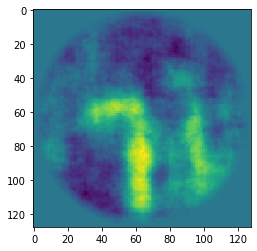

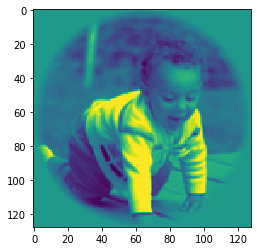

In [9]:
plt.imshow(eigen_ims[0,:].reshape(128,128))
plt.show()
plt.imshow(ims[0,:].reshape(128,128))